In [48]:
import numpy as np
import matplotlib.pyplot as plt

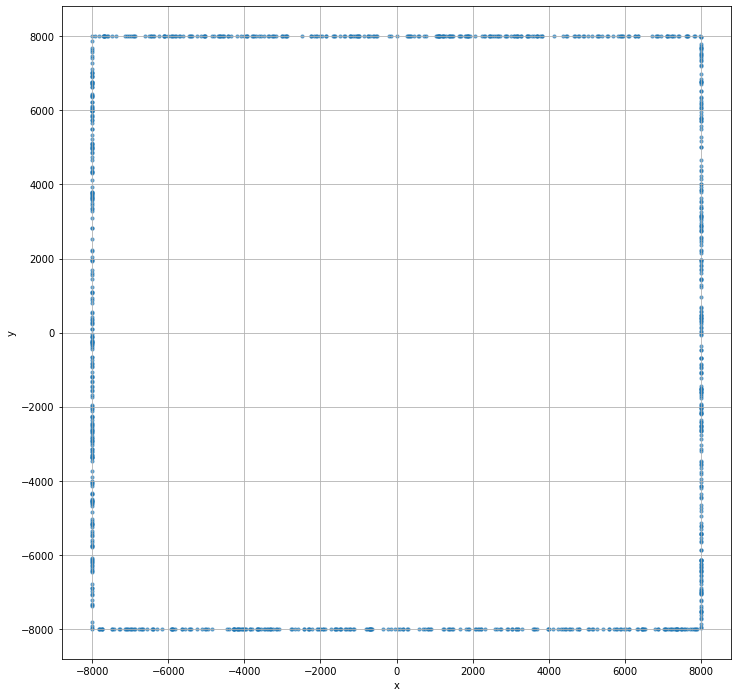

In [49]:
lim, n = 10_000, 1000

# y = np.random.uniform(-lim, lim, 1000)
# x = np.random.uniform(-lim, lim, 1000)
# k = 6

# data = [(x[i], y[i]) for i in range(n)]

#square
r = 8000
x, y = [], []
x.extend(np.random.uniform(-r, r, n//4))
y.extend([r] * (n//4)) #top
x.extend(np.random.uniform(-r, r, n//4))
y.extend([-r]*(n//4)) #bottom
y.extend(np.random.uniform(-r, r, n//4))
x.extend([r] * (n//4)) #right
y.extend(np.random.uniform(-r, r, n//4))
x.extend([-r]*(n//4)) #left
data = np.array([(x[i], y[i]) for i in range(n)])
k = 4

plt.figure(figsize=(12,12))
plt.scatter(x, y, s=10, alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [50]:
np.random.seed(0)

In [51]:
def upd(data, k, eps = 1e-12):
    data_arr = np.array(data)
    # muo_k = np.array([data[i] for i in np.random.choice(len(data), size=k, replace=False)])
    s = 4000 #square
    muo_k = np.array([(s, -s), (-s, -s), (s, s), (-s, s)])

    distortions = []
    colors = np.zeros(len(data), dtype=int)
    centroids_history = [muo_k.copy()]
    
    while len(distortions) < 2 or np.abs(distortions[-1]-distortions[-2])>eps:
        j = 0.0
        for i in range(len(data)):
            dists = np.linalg.norm(data_arr[i] - muo_k, axis=1)
            x = np.argmin(dists)
            colors[i] = x
            j+= dists[x]

        distortions.append(j)
        new_muo = []
        for x in range(len(muo_k)):
            pts = data_arr[colors==x]
            if len(pts) > 0:
                new_muo.append(pts.mean(axis=0))
            else:
                new_muo.append(muo_k[x])
        muo_k = np.array(new_muo)
        centroids_history.append(muo_k.copy())

    return colors, muo_k, distortions, centroids_history


In [52]:
colors, muo_k, distortions, centroids_history = upd(data, 6)
print(distortions)

[np.float64(4595532.3335533105), np.float64(3375145.6126055922), np.float64(3373631.5412467066), np.float64(3372614.6119159735), np.float64(3372090.027979398), np.float64(3372090.027979398)]


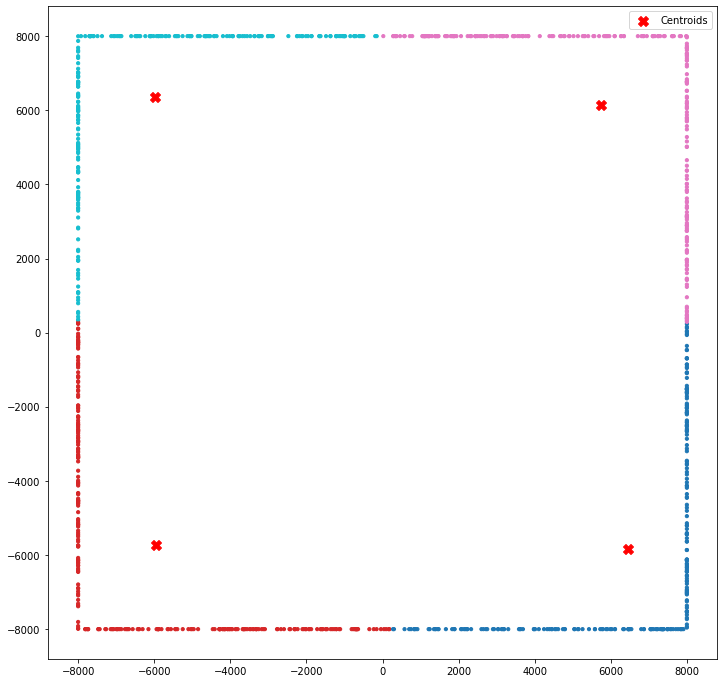

In [53]:
plt.figure(figsize=(12,12))
plt.scatter(x, y, c=colors, cmap="tab10", s=10)
plt.scatter(*zip(*muo_k), c="red", marker="X", s=100, label="Centroids")
plt.legend()
plt.show()

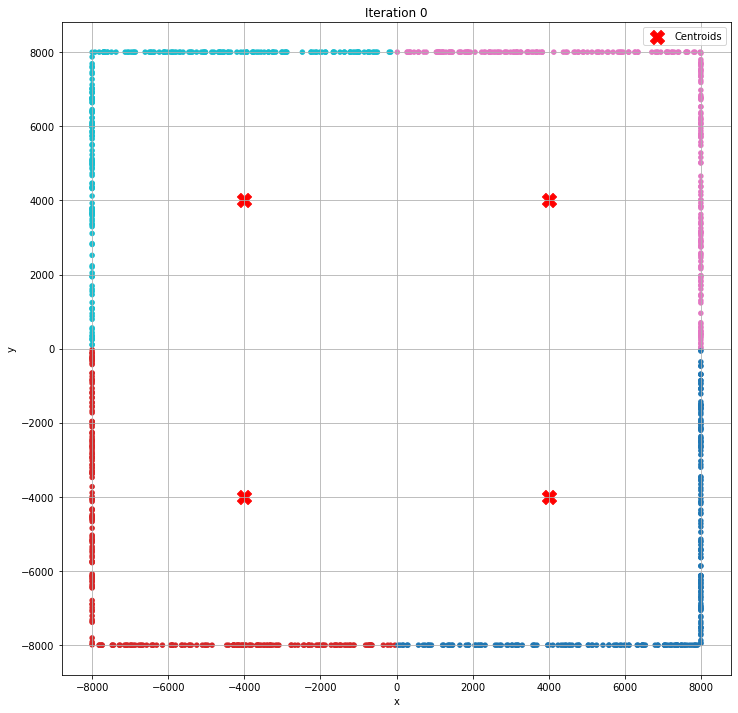

In [55]:
import matplotlib.animation as animation
from matplotlib import pyplot as plt
from IPython.display import HTML

data_arr = np.array(data)

# Compute colors for each frame
colors_history = []
for centroids in centroids_history:
    colors = np.array([np.argmin(np.linalg.norm(point - centroids, axis=1)) for point in data_arr])
    colors_history.append(colors)

fig, ax = plt.subplots(figsize=(12,12))

def animate(i):
    ax.clear()
    ax.scatter(x, y, c=colors_history[i], cmap="tab10", s=20)
    centroids = centroids_history[i]
    ax.scatter(*zip(*centroids), c="red", marker="X", s=200, label="Centroids")
    ax.set_title(f"Iteration {i}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.grid(True)
    ax.legend()

ani = animation.FuncAnimation(fig, animate, frames=len(centroids_history), interval=800, repeat=False)

HTML(ani.to_jshtml())